In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
gal = gchop.center(gal)

In [4]:
gal = gchop.star_align(gal)

In [5]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,-0.054824,-0.063223,-0.260845,5.949678,22.550460,-6.055106,0.0,-195699.620206,290.293111,-195409.327095,6.264991,-1.883910,-0.860159
1,stars,0,9.745897e+05,-0.161120,-0.127723,-0.177528,21.909445,8.321999,-0.535136,0.0,-196176.962277,274.782915,-195902.179362,1.545736,-3.975758,1.457514
2,stars,0,6.935776e+05,-0.256088,-0.165705,-0.196836,-9.493458,7.263093,15.637166,0.0,-195152.120168,193.699612,-194958.420557,-1.161512,5.873138,-3.433097
3,stars,0,1.070959e+06,-0.235092,-0.256281,-0.369501,-9.675913,-5.471289,-0.817244,0.0,-194695.767625,62.113089,-194633.654536,-1.812200,3.383127,-1.193495
4,stars,0,6.013803e+05,-0.076621,-0.199932,-0.282408,16.533770,8.094719,-17.010778,0.0,-195703.942688,314.128285,-195389.814402,5.687005,-5.972652,2.685397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57279,gas,2,1.400046e+06,-2.245883,2.358065,-8.389589,-18.031673,34.561220,-269.322856,0.0,-129252.826165,37027.209909,-92225.616256,-345.126246,-453.589180,-35.100593
57280,gas,2,1.375867e+06,-1.333431,2.056292,8.098147,-3.554033,-10.650944,275.247567,0.0,-129835.893336,37943.648417,-91892.244919,652.242363,338.242612,21.510432
57281,gas,2,9.908498e+05,-9.278659,-0.275191,2.774880,-147.978426,-203.402319,73.776431,0.0,-132966.102621,34356.539847,-98609.562774,544.114355,273.923985,1846.578340
57282,gas,2,1.456959e+06,-5.980264,5.097995,4.875443,-192.738278,87.675395,217.206835,0.0,-132205.106762,46006.913910,-86198.192853,679.862938,359.269707,458.256750


# Descomposicion

In [6]:
circ = gchop.utils.jcirc(gal)
circ

JCirc(normalized_star_energy=array([-0.99509357, -0.99760334, -0.99279739, ..., -0.13989039,
       -0.08796932, -0.06652457]), normalized_star_Jz=array([-9.24079355e-05,  1.56582528e-04, -3.68821838e-04, ...,
       -1.37554847e-01,  4.23475904e-01,  7.12919724e-01]), eps=array([-0.10974301,  0.38068977, -0.29837353, ..., -0.17532475,
        0.54943866,  0.86226812]), eps_r=array([0.8643671 , 1.15379305, 0.53883725, ..., 0.53970452, 1.12444831,
       0.3601765 ]), x=array([-1.        , -0.95927071, -0.9004535 , -0.85024711, -0.80186797,
       -0.75018146, -0.70010322, -0.65051785, -0.60334024, -0.55155718,
       -0.50014295, -0.45108036, -0.40063531, -0.36278941, -0.30919036,
       -0.25092359, -0.24736776, -0.18470211, -0.1248638 , -0.09920325,
       -0.09229182, -0.0859902 , -0.08130821, -0.07514371, -0.07208031,
       -0.0660381 , -0.06311026, -0.05856595, -0.04632291, -0.04388853,
       -0.03508332, -0.03128673, -0.02683017, -0.00282447]), y=array([0.        , 0.00698994, 

## Threshold

In [7]:
decomposer = gchop.models.JThreshold()
cmp_labels = decomposer.decompose(gal)
labels_th = cmp_labels.labels[cmp_labels.ptypes == 'stars']
cmp_labels

Components(57284, labels=[ 0.  1. nan], probabilities=False)

In [8]:
#gchop.models.JThreshold?

## Abadi+03

In [9]:
decomposer = gchop.models.JHistogram()
cmp_labels = decomposer.decompose(gal)
labels_ab = cmp_labels.labels[cmp_labels.ptypes == 'stars']
cmp_labels

Components(57284, labels=[ 0.  1. nan], probabilities=False)

## K-means

In [10]:
decomposer = gchop.models.KMeans(random_state=20110626)
cmp_labels = decomposer.decompose(gal)
labels_km = cmp_labels.labels[cmp_labels.ptypes == 'stars']

decomposer = gchop.models.KMeans(n_components=3, random_state=2818)
cmp_labels = decomposer.decompose(gal)
labels_km3 = cmp_labels.labels[cmp_labels.ptypes == 'stars']
#lab0: Bulge
#lab1: Thin Disk
#lab2: Thick Disk

decomposer = gchop.models.KMeans(n_components=4,random_state=206626)
cmp_labels = decomposer.decompose(gal)
labels_km4 = cmp_labels.labels[cmp_labels.ptypes == 'stars']
#lab0: Stellar halo
#lab1: Thin disk
#lab2: Bulge
#lab3: Thick disk


for index, value in enumerate(labels_km4):
    if value == 1:
      labels_km4[index] = 2
    if value == 2:
      labels_km4[index] = 1


#lab0: Stellar halo
#lab1: Bulge
#lab2: Thin Disk
#lab3: Thick disk
cmp_labels

Components(57284, labels=[ 0.  1.  2.  3. nan], probabilities=False)

## Cristiani

In [11]:
decomposer = gchop.models.JEHistogram()
cmp_labels = decomposer.decompose(gal)
labels_cr = cmp_labels.labels[cmp_labels.ptypes == 'stars']
cmp_labels

Components(57284, labels=[ 0.  1. nan], probabilities=False)

## GMM

In [12]:
decomposer = gchop.models.GaussianMixture(random_state=2626)
cmp_labels = decomposer.decompose(gal)

#Labels
labels_gmm = cmp_labels.labels[cmp_labels.ptypes == 'stars']

#Probabilities
probs_gmm = cmp_labels.probabilities[cmp_labels.ptypes == 'stars']


In [13]:
decomposer = gchop.models.GaussianMixture(n_components=3,random_state=24788)
cmp_labels = decomposer.decompose(gal)
labels_gmm3 = cmp_labels.labels[cmp_labels.ptypes == 'stars']

#lab0: Bulge
#lab1: Thin Disk
#lab2: Thick Disk


decomposer = gchop.models.GaussianMixture(n_components=4, random_state=201126)
cmp_labels = decomposer.decompose(gal)
labels_gmm4 = cmp_labels.labels[cmp_labels.ptypes == 'stars']
#lab0: Stellar halo
#lab1: Bulge
#lab2: Thin Disk
#lab3: Thick disk
cmp_labels

#Probabilities
probs_gmm4 = cmp_labels.probabilities[cmp_labels.ptypes == 'stars']

<AxesSubplot:xlabel='eps', ylabel='Density'>

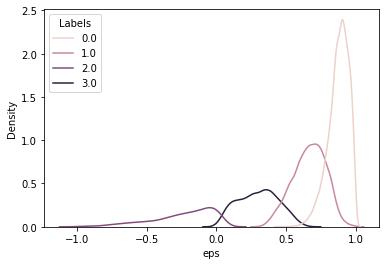

In [14]:
gal.plot.circ_kde("eps",labels=labels_km4)

## Auto-GMM

In [15]:
decomposer = gchop.models.AutoGaussianMixture() #njobs paralell
cmp_labels = decomposer.decompose(gal)
labels_agmm = cmp_labels.labels[cmp_labels.ptypes == 'stars']
cmp_labels

#Probabilities
probs_agmm = cmp_labels.probabilities[cmp_labels.ptypes == 'stars']

# DataFrame stars particles

In [16]:
dfs = gal.stars.to_dataframe()

In [17]:
print(len(gal.stars.x))
print(len(labels_th))

32067
32067


In [18]:
dfs.isnull().sum()

ptype             0
ptypev            0
m                 0
x                 0
y                 0
z                 0
vx                0
vy                0
vz                0
softening         0
potential         0
kinetic_energy    0
total_energy      0
Jx                0
Jy                0
Jz                0
dtype: int64

In [26]:
#Agrego labels al data frame
dfs["lab_th"]=labels_th
dfs["lab_ab"]=labels_ab
dfs["lab_cr"]=labels_cr
dfs["lab_km"]=labels_km
dfs["lab_km3"]=labels_km3
dfs["lab_km4"]=labels_km4
dfs["lab_gmm"]=labels_gmm
dfs["lab_gmm3"]=labels_gmm3
dfs["lab_gmm4"]=labels_gmm4
dfs["lab_agmm"]=labels_agmm

In [19]:
dfs

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.054824,-0.063223,-0.260845,5.949678,22.550460,-6.055106,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
1,stars,0,9.745897e+05,-0.161120,-0.127723,-0.177528,21.909445,8.321999,-0.535136,0.0,...,0.0,1.0,1.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0
2,stars,0,6.935776e+05,-0.256088,-0.165705,-0.196836,-9.493458,7.263093,15.637166,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
3,stars,0,1.070959e+06,-0.235092,-0.256281,-0.369501,-9.675913,-5.471289,-0.817244,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
4,stars,0,6.013803e+05,-0.076621,-0.199932,-0.282408,16.533770,8.094719,-17.010778,0.0,...,0.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,stars,0,1.343808e+06,15.394374,-13.615094,0.149480,249.650695,244.472680,-41.765153,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
32063,stars,0,7.382408e+05,-7.436244,16.466565,-0.735001,-267.224099,281.248845,-52.902787,0.0,...,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0
32064,stars,0,6.786477e+05,15.171295,-10.470204,-6.430860,-353.009725,159.227328,-72.137340,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0
32065,stars,0,8.290853e+05,14.695170,15.612993,-5.270562,-4.742671,263.201137,314.186911,0.0,...,0.0,1.0,1.0,1.0,2.0,3.0,0.0,1.0,2.0,1.0


## df GMM

In [73]:
df_gmm = gal.stars.to_dataframe()

In [75]:
df_gmm.drop(columns=['x', 'y', 'z','vx', 'vy', 'vz','total_energy','softening', 'potential', 'kinetic_energy','Jx', 'Jy', 'Jz'], axis=1, inplace=True)
df_gmm["lab_gmm"]=labels_gmm
df_gmm["pro_gmm_0"]=probs_gmm[:,0]
df_gmm["pro_gmm_1"]=probs_gmm[:,1]
df_gmm["mass_gmm_0"]=probs_gmm[:,0]*df_gmm.m
df_gmm["mass_gmm_1"]=probs_gmm[:,1]*df_gmm.m

In [76]:
df_gmm

,ptype,ptypev,m,lab_gmm,pro_gmm_0,pro_gmm_1,mass_gmm_0,mass_gmm_1
0,stars,0,5.224283e+05,0.0,1.000000,1.120007e-17,5.224283e+05,5.851231e-12
1,stars,0,9.745897e+05,0.0,1.000000,8.750113e-13,9.745897e+05,8.527770e-07
2,stars,0,6.935776e+05,0.0,1.000000,6.670398e-29,6.935776e+05,4.626438e-23
3,stars,0,1.070959e+06,0.0,1.000000,5.577193e-22,1.070959e+06,5.972943e-16
4,stars,0,6.013803e+05,0.0,1.000000,7.523043e-11,6.013803e+05,4.524210e-05
...,...,...,...,...,...,...,...,...
32062,stars,0,1.343808e+06,1.0,0.042462,9.575384e-01,5.706022e+04,1.286747e+06
32063,stars,0,7.382408e+05,0.0,1.000000,1.129317e-13,7.382408e+05,8.337076e-08
32064,stars,0,6.786477e+05,0.0,1.000000,4.848844e-32,6.786477e+05,3.290657e-26
32065,stars,0,8.290853e+05,0.0,1.000000,2.124121e-16,8.290853e+05,1.761077e-10


In [92]:
mass_tot=df_gmm.m.sum(axis =0)
print('Total Mass = ',mass_tot)
mass_tot_0=df_gmm.mass_gmm_0.sum(axis =0)/mass_tot*100.
print('% masa comp 0 =',mass_tot_0)
mass_tot_1=df_gmm.mass_gmm_1.sum(axis =0)/mass_tot*100.
print('% masa comp 1 =',mass_tot_1)

Total Mass =  31820027776.34807
% masa comp 0 = 43.36501321994609
% masa comp 1 = 56.08967029464558


In [93]:
#length
print(len(probs_gmm[:,0]))
print(len(labels_gmm))
#label1
print(len(probs_gmm[:,1]))

32067
32067
32067


In [95]:
df_gmm4 = gal.stars.to_dataframe()
df_gmm4.drop(columns=['x', 'y', 'z','vx', 'vy', 'vz','total_energy','softening', 'potential', 'kinetic_energy','Jx', 'Jy', 'Jz'], axis=1, inplace=True)
df_gmm4["lab_gmm"]=labels_gmm4

df_gmm4["pro_gmm_0"]=probs_gmm4[:,0]
df_gmm4["pro_gmm_1"]=probs_gmm4[:,1]
df_gmm4["pro_gmm_2"]=probs_gmm4[:,2]
df_gmm4["pro_gmm_3"]=probs_gmm4[:,3]


df_gmm4["mass_gmm_0"]=probs_gmm4[:,0]*df_gmm4.m
df_gmm4["mass_gmm_1"]=probs_gmm4[:,1]*df_gmm4.m
df_gmm4["mass_gmm_2"]=probs_gmm4[:,2]*df_gmm4.m
df_gmm4["mass_gmm_3"]=probs_gmm4[:,3]*df_gmm4.m


In [96]:
df_gmm4

,ptype,ptypev,m,lab_gmm,pro_gmm_0,pro_gmm_1,pro_gmm_2,pro_gmm_3,mass_gmm_0,mass_gmm_1,mass_gmm_2,mass_gmm_3
0,stars,0,5.224283e+05,1.0,8.911514e-76,9.610317e-01,0.038968,6.442384e-13,4.655627e-70,5.020702e+05,20358.116912,3.365684e-07
1,stars,0,9.745897e+05,1.0,2.340218e-45,8.471037e-01,0.152896,5.809298e-09,2.280753e-39,8.255785e+05,149011.165537,5.661682e-03
2,stars,0,6.935776e+05,1.0,2.907179e-106,9.886635e-01,0.011336,6.294538e-16,2.016354e-100,6.857149e+05,7862.713352,4.365750e-10
3,stars,0,1.070959e+06,1.0,4.010545e-75,9.468133e-01,0.053187,2.543216e-10,4.295127e-69,1.013998e+06,56960.703205,2.723678e-04
4,stars,0,6.013803e+05,1.0,6.137079e-42,8.162660e-01,0.183734,3.915792e-08,3.690718e-36,4.908863e+05,110493.970321,2.354880e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
32062,stars,0,1.343808e+06,0.0,8.623462e-01,3.031125e-16,0.002414,1.352402e-01,1.158827e+06,4.073249e-10,3243.476660,1.817368e+05
32063,stars,0,7.382408e+05,2.0,1.035526e-40,3.452212e-16,0.991762,8.238348e-03,7.644673e-35,2.548563e-10,732158.893763,6.081885e+03
32064,stars,0,6.786477e+05,2.0,5.833134e-106,4.325005e-17,1.000000,4.789209e-11,3.958643e-100,2.935155e-11,678647.702411,3.250186e-05
32065,stars,0,8.290853e+05,2.0,4.325447e-43,4.811738e-18,0.999977,2.337443e-05,3.586164e-37,3.989341e-12,829065.877156,1.937940e+01


In [101]:
mass_tot=df_gmm4.m.sum(axis =0)
print('Total Mass = ',mass_tot)
mass_tot_0=df_gmm4.mass_gmm_0.sum(axis =0)/mass_tot*100.
print('% masa comp 0 =',mass_tot_0)
mass_tot_1=df_gmm4.mass_gmm_1.sum(axis =0)/mass_tot*100.
print('% masa comp 1 =',mass_tot_1)
mass_tot_2=df_gmm4.mass_gmm_2.sum(axis =0)/mass_tot*100.
print('% masa comp 2 =',mass_tot_2)
mass_tot_3=df_gmm4.mass_gmm_3.sum(axis =0)/mass_tot*100.
print('% masa comp 3 =',mass_tot_3)
mass_tot_0+mass_tot_1+mass_tot_2+mass_tot_3

Total Mass =  31820027776.34807
% masa comp 0 = 31.99118144397736
% masa comp 1 = 16.032363388379522
% masa comp 2 = 16.339320974392574
% masa comp 3 = 35.091817707842196


99.45468351459165

## df AGMM

In [104]:
df_agmm = gal.stars.to_dataframe()
df_agmm.drop(columns=['x', 'y', 'z','vx', 'vy', 'vz','total_energy','softening', 'potential', 'kinetic_energy','Jx', 'Jy', 'Jz'], axis=1, inplace=True)
df_agmm["lab_agmm"]=labels_agmm

df_agmm["pro_agmm_0"]=probs_agmm[:,0]
df_agmm["pro_agmm_1"]=probs_agmm[:,1]
df_agmm["pro_agmm_2"]=probs_agmm[:,2]
df_agmm["pro_agmm_3"]=probs_agmm[:,3]


df_agmm["mass_agmm_0"]=probs_agmm[:,0]*df_agmm.m
df_agmm["mass_agmm_1"]=probs_agmm[:,1]*df_agmm.m
df_agmm["mass_agmm_2"]=probs_agmm[:,2]*df_agmm.m
df_agmm["mass_agmm_3"]=probs_agmm[:,3]*df_agmm.m

In [105]:
df_agmm

,ptype,ptypev,m,lab_agmm,pro_agmm_0,pro_agmm_1,pro_agmm_2,pro_agmm_3,mass_agmm_0,mass_agmm_1,mass_agmm_2,mass_agmm_3
0,stars,0,5.224283e+05,1.0,1.116402e-09,9.999932e-01,1.987680e-103,6.768046e-06,5.832401e-04,522424.735832,1.038420e-97,3.535818
1,stars,0,9.745897e+05,1.0,2.548567e-16,9.996350e-01,1.343551e-68,3.650218e-04,2.483807e-10,974233.964907,1.309411e-62,355.746497
2,stars,0,6.935776e+05,1.0,3.909549e-04,9.996090e-01,6.280443e-133,9.118644e-09,2.711575e+02,693306.439804,4.355974e-127,0.006324
3,stars,0,1.070959e+06,1.0,4.302804e-01,5.697189e-01,4.179693e-91,6.362345e-07,4.608125e+05,610145.369519,4.476278e-85,0.681381
4,stars,0,6.013803e+05,1.0,7.033739e-14,9.985457e-01,2.146254e-63,1.454307e-03,4.229952e-08,600505.715228,1.290715e-57,874.591534
...,...,...,...,...,...,...,...,...,...,...,...,...
32062,stars,0,1.343808e+06,2.0,1.872251e-01,5.914467e-07,7.184819e-01,9.429246e-02,2.515945e+05,0.794791,9.655014e+05,126710.932490
32063,stars,0,7.382408e+05,0.0,9.997650e-01,8.848234e-05,3.117402e-47,1.465370e-04,7.380673e+05,65.321273,2.301393e-41,108.179561
32064,stars,0,6.786477e+05,1.0,1.283854e-01,8.711666e-01,2.733325e-128,4.479535e-04,8.712848e+04,591215.224422,1.854964e-122,304.002598
32065,stars,0,8.290853e+05,1.0,1.312800e-09,9.999921e-01,7.770762e-65,7.859905e-06,1.088423e-03,829078.738935,6.442624e-59,6.516531


In [106]:
mass_tot=df_agmm.m.sum(axis =0)
print('Total Mass = ',mass_tot)

mass_tot_0=df_agmm.mass_agmm_0.sum(axis =0)/mass_tot*100.
print('% masa comp 0 =',mass_tot_0)

mass_tot_1=df_agmm.mass_agmm_1.sum(axis =0)/mass_tot*100.
print('% masa comp 1 =',mass_tot_1)

mass_tot_2=df_agmm.mass_agmm_2.sum(axis =0)/mass_tot*100.
print('% masa comp 2 =',mass_tot_2)

mass_tot_3=df_agmm.mass_agmm_3.sum(axis =0)/mass_tot*100.
print('% masa comp 3 =',mass_tot_3)

mass_tot_0+mass_tot_1+mass_tot_2+mass_tot_3

Total Mass =  31820027776.34807
% masa comp 0 = 12.43614083287134
% masa comp 1 = 16.34755136643953
% masa comp 2 = 27.331733439547012
% masa comp 3 = 43.339257875733786


99.45468351459166

# Save DataFrame Stars 

In [20]:
#dfs.to_pickle('df_stars.pkl')

In [21]:
#df1 = pd.read_pickle('df_stars.pkl')